In [ ]:
!apt-get update && apt-get install -y libspatialindex-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [856 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InR

In [ ]:
!pip install Rtree

     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for Rtree: filename=Rtree-0.9.4-cp36-none-any.whl size=21766 sha256=361a3f00f1c8bbd052112cd2c0f4ee5b7e03706203f4cea300cf2fe854dfc9a2
  Stored in directory: /root/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e
Successfully built Rtree


In [ ]:
!pip install geopandas 

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/file/nutritive.csv')
df = df.drop(columns=['Unnamed: 0'])

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 16.7MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df[df.l3 == "Medellín"].count()

id                 108034
ad_type            108034
start_date         108034
end_date           108034
created_on         108034
lat                 86204
lon                 86204
l1                 108034
l2                 108034
l3                 108034
l4                  64206
l5                      0
l6                      0
rooms               31097
bedrooms            60037
bathrooms          100966
surface_total       80435
surface_covered     33512
price              106521
currency           103295
price_period        37300
title              108034
description        108034
property_type      108034
operation_type     108034
dtype: int64

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


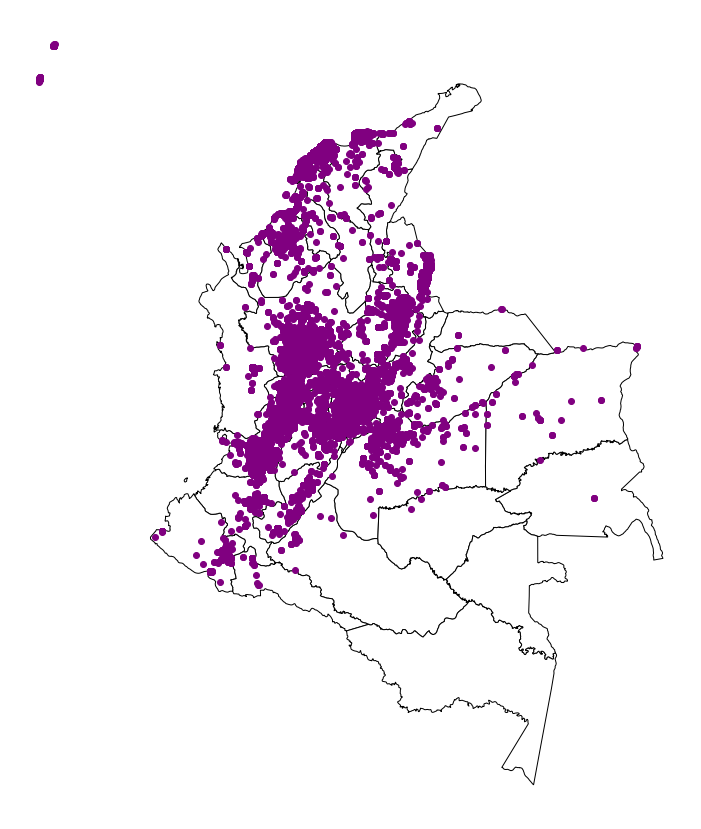

In [ ]:
gdf_geom = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.lon, df.lat), crs={'init': 'epsg:4326'})
URL = 'https://www.acolgen.org.co/wp-content/uploads/geo-json/colombia.geo.json'
sectores = gpd.read_file(URL)

ax = sectores.plot(color='white', edgecolor='black', figsize = (15,15))
ax.set_axis_off()
gdf_geom.plot(ax = ax, color = 'purple')
plt.savefig('world1.png', dpi = 600)

In [ ]:
df1 = df.copy()
df1 = df1[df1.l3 == "Medellín"]
df1 = df1.dropna(subset=["lat", "lon"])
df1.shape

(86204, 25)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


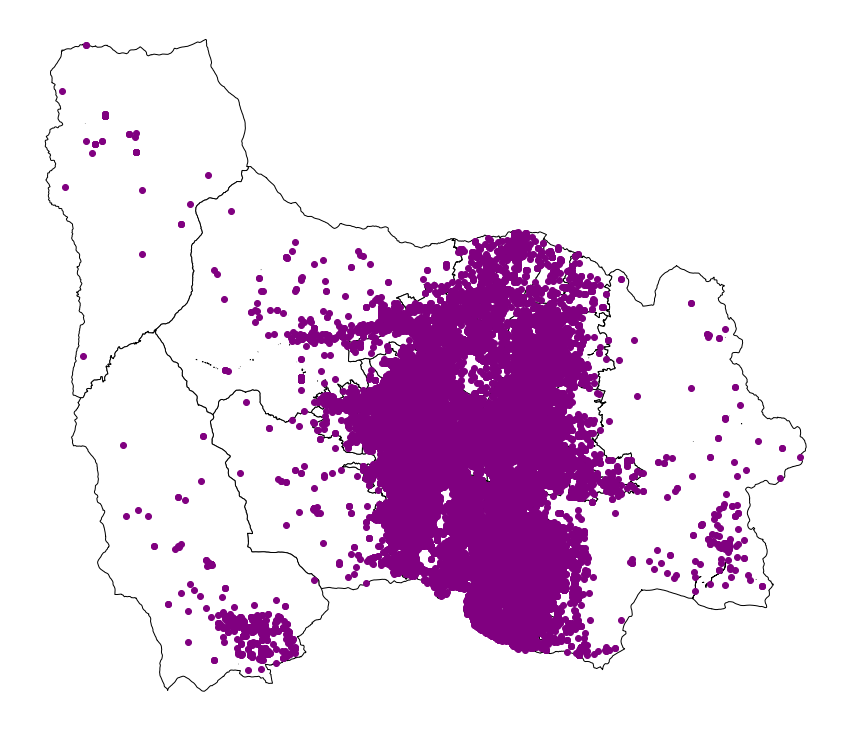

In [ ]:
gdf_geom = gpd.GeoDataFrame(df1[['lon', 'lat']], geometry = \
                            gpd.points_from_xy(df1.lon, df1.lat),crs={'init': 'epsg:4326'})

URL = 'https://opendata.arcgis.com/datasets/283d1d14584641c9971edbd2f695e502_6.geojson'

sectores = gpd.read_file(URL)
sectores = sectores.to_crs({'init': 'epsg:4326'})

join = gpd.sjoin (gdf_geom, sectores, op='intersects')
Sale_Medellin = join.loc[join.isna()['SECTOR'].apply(lambda value: not value)]


ax = sectores.plot(color='white', edgecolor='black',figsize = (15,15))
ax.set_axis_off()
Sale_Medellin.plot(ax = ax, color = 'purple')
#plt.title(r"Ubicacion de Viviendas en Vent#a Por Comunas e Medellin", fontsize=20)
plt.savefig('world.png', dpi = 600)

In [ ]:
index, counts = np.unique(Sale_Medellin.NOMBRE,return_counts=True)
df4 = pd.DataFrame({'date': index, 'n': counts})


In [ ]:
merged = sectores.set_index('NOMBRE').join(df4.set_index('date'))

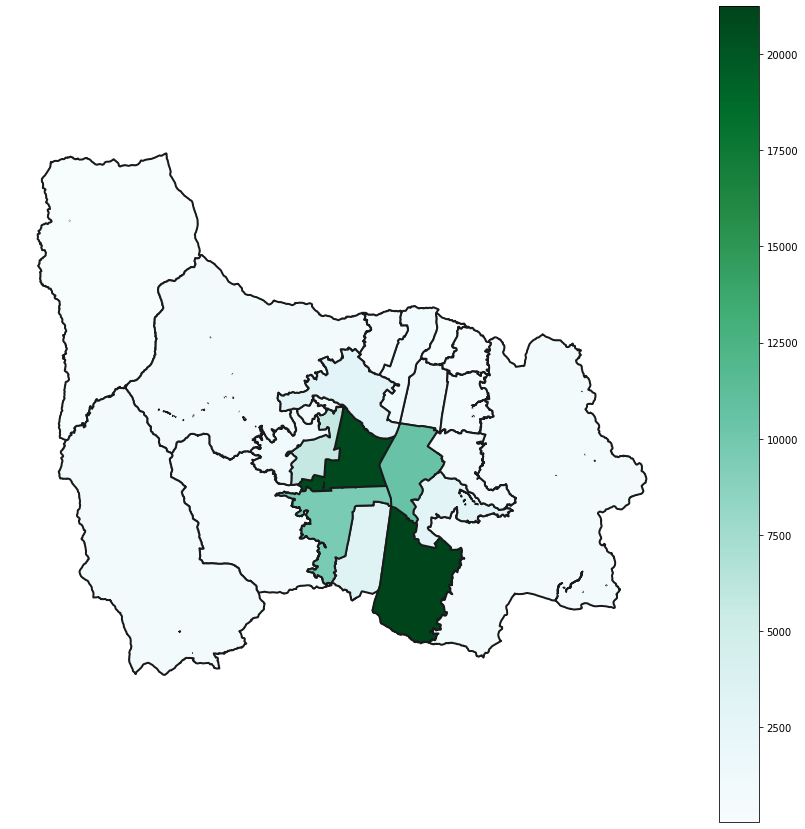

In [ ]:
ax = sectores.plot(color='white', edgecolor='black',figsize = (15,15))
ax.set_axis_off()
merged.plot('n', cmap='BuGn', linewidth=2, ax=ax, edgecolor='0.1',legend=True)
#plt.title(r"Ubicacion de Viviendas en Vent#a Por Comunas e Medellin", fontsize=20)
plt.savefig('world2.png', dpi = 600)


In [ ]:
merged2 = Sale_Medellin.set_index('NOMBRE').join(df4.set_index('n'))
merged2

,lon,lat,geometry,index_right,OBJECTID,COMUNA,SECTOR,SHAPEAREA,SHAPELEN,date
ALTAVISTA,-75.607002,6.216000,POINT (-75.60700 6.21600),6,7,70,8,2.859120e+07,36767.905270,NaN
ALTAVISTA,-75.607888,6.215453,POINT (-75.60789 6.21545),6,7,70,8,2.859120e+07,36767.905270,NaN
ALTAVISTA,-75.607002,6.216000,POINT (-75.60700 6.21600),6,7,70,8,2.859120e+07,36767.905270,NaN
ALTAVISTA,-75.608002,6.215000,POINT (-75.60800 6.21500),6,7,70,8,2.859120e+07,36767.905270,NaN
ALTAVISTA,-75.608002,6.218000,POINT (-75.60800 6.21800),6,7,70,8,2.859120e+07,36767.905270,NaN
...,...,...,...,...,...,...,...,...,...,...
VILLA HERMOSA,-75.545000,6.246000,POINT (-75.54500 6.24600),15,16,08,3,5.900459e+06,17028.146251,NaN
VILLA HERMOSA,-75.551000,6.260000,POINT (-75.55100 6.26000),15,16,08,3,5.900459e+06,17028.146251,NaN
VILLA HERMOSA,-75.536000,6.238000,POINT (-75.53600 6.23800),15,16,08,3,5.900459e+06,17028.146251,NaN
VILLA HERMOSA,-75.546000,6.253000,POINT (-75.54600 6.25300),15,16,08,3,5.900459e+06,17028.146251,NaN


In [ ]:
df2 = df1.copy()
df2 = df2.loc[Sale_Medellin.index]
df2['ubicacion'] = np.array(Sale_Medellin.NOMBRE)
df2 = df2.loc[df2[df2.operation_type == 'Venta'].index]
df2 = df2.drop(['id', 'created_on', 'ad_type', 'start_date', 'end_date', 'l1', 'l2','l3', 'l4','l5','l6', 'price_period', 'description', 'operation_type' , 'title'], axis =1)
df2

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,ubicacion
5,6.238877,-75.600494,NaN,7.0,4.0,290.0,NaN,0.000000e+00,NaN,Otro,LAURELES
29,6.250242,-75.588402,4.0,NaN,3.0,250.0,450.0,1.350000e+09,COP,Casa,LAURELES
81,6.239079,-75.597577,NaN,NaN,1.0,70.0,NaN,0.000000e+00,NaN,Otro,LAURELES
83,6.238604,-75.600837,NaN,NaN,1.0,79.0,NaN,0.000000e+00,NaN,Otro,LAURELES
84,6.238724,-75.600736,NaN,NaN,1.0,40.0,NaN,0.000000e+00,NaN,Otro,LAURELES
...,...,...,...,...,...,...,...,...,...,...,...
850471,6.350697,-75.699962,NaN,NaN,NaN,454.0,NaN,4.540000e+09,COP,Lote,PALMITAS
911857,6.338000,-75.704000,3.0,3.0,2.0,59.0,59.0,1.700000e+08,COP,Apartamento,PALMITAS
911858,6.341000,-75.703000,3.0,3.0,2.0,58.0,58.0,1.600000e+08,COP,Apartamento,PALMITAS
922396,6.341000,-75.703000,3.0,3.0,3.0,81.0,81.0,2.500000e+08,COP,Casa,PALMITAS


In [ ]:
df2 = df2.drop(df2[df2.currency == 'USD'].index)


In [ ]:
df2 = df2.drop(['currency'], axis = 1)

In [ ]:
df2.price.isna().value_counts()

False    44887
True       255
Name: price, dtype: int64

In [ ]:
df2 = df2[df2['price']<df2['price'].quantile(0.98)]
df2 = df2[df2['price']>df2['price'].quantile(0.05)]
print(df2['price'].quantile(0.98),df2['price'].quantile(0.01))

2100000000.0 120000000.0


In [ ]:
df2.shape

(41591, 10)

In [ ]:
df2.rooms = df2.groupby('property_type')['rooms'].apply(lambda x: x.fillna(x.mean()))
df2.rooms = df2.rooms.fillna(df2.rooms.mean())

df2.price = df2.groupby('property_type')['price'].apply(lambda x: x.fillna(x.mean()))
df2.price = df2.price.fillna(df2.price.mean())

df2.bathrooms  = df2.groupby('property_type')['bathrooms'].apply(lambda x: x.fillna(x.mean()))
df2.bathrooms  = df2.bathrooms.fillna(df2.bathrooms.mean())

df2.surface_covered  = df2.groupby('property_type')['surface_covered'].apply(lambda x: x.fillna(x.mean()))
df2.surface_covered  = df2.surface_covered.fillna(df2.surface_covered.mean())

df2.surface_total  = df2.groupby('property_type')['surface_total'].apply(lambda x: x.fillna(x.mean()))
df2.surface_total  = df2.surface_total.fillna(df2.surface_total.mean())

df2.bedrooms = df2.groupby('property_type')['bedrooms'].apply(lambda x: x.fillna(x.mean()))
df2.bedrooms  = df2.bedrooms.fillna(df2.bedrooms.mean())


In [ ]:
print(df2.isnull().sum())

lat                0
lon                0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
ubicacion          0
dtype: int64


In [ ]:
df2['price'] = df2['price'].apply(lambda x : np.log(x))

In [ ]:
import sklearn.preprocessing as pp

LE = pp.LabelEncoder()
df2.property_type = LE.fit_transform(df2.property_type)
df2.ubicacion = LE.fit_transform(df2.ubicacion)

In [ ]:
from  sklearn.model_selection import train_test_split 

X, y = df2[['rooms',	'bedrooms',	'bathrooms',	'surface_total'	,'surface_covered','property_type', 'ubicacion']], df2.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = df2.ubicacion)

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
def error(Y_test, Y_estimate):
    print("R^2 :", mean_squared_log_error(Y_test, Y_estimate))   

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
predi = RF.predict(X_test)
error(y_test, predi)

R^2 : 0.7684129414417324


In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt','objective': 'regression', 'metric': {'l2', 'l1'},'num_leaves': 31,
    'learning_rate': 0.05, 'feature_fraction': 0.7,'bagging_fraction': 0.8, 'bagging_freq': 5,  'verbose': 0
}

model4 = lgb.train(params,
                lgb_train,
                num_boost_round=6000,
                valid_sets=lgb_eval,
                early_stopping_rounds=10000)

pred = model4.predict(X_test, num_iteration=model4.best_iteration)

In [ ]:
error(y_test, pred)

R^2 : 0.0002458094377442062


In [ ]:
cv_results = lgb.cv(
        params,
        lgb_train,
        num_boost_round=100,
        nfold=3,
        metrics='mse',
        early_stopping_rounds=10,
        stratified=False
        )

In [ ]:
cv_results

{'l2-mean': [0.4542223146863614,
  0.428578111372627,
  0.40916575915051606,
  0.3873875819569092,
  0.36773558239020804,
  0.3495900546917743,
  0.3339894162974562,
  0.31876856412938165,
  0.3047703196501694,
  0.2962188575569132,
  0.2878442570413284,
  0.27693343399365866,
  0.26654810481981855,
  0.2572483944419572,
  0.2485484455244785,
  0.2400628016466795,
  0.23362168603701208,
  0.22573862235868838,
  0.21872913196877194,
  0.21310957959284602,
  0.2091655621892672,
  0.2034628115721894,
  0.20003164335699974,
  0.1953573720715369,
  0.19245110584412026,
  0.18883431888915578,
  0.18473801478799567,
  0.18112869495776643,
  0.17780182107626355,
  0.17481460540276406,
  0.17196369055649105,
  0.16909140292854286,
  0.1667028578969382,
  0.16433715302003557,
  0.1622462781557362,
  0.16080103834366635,
  0.15862071160865113,
  0.15652242920178805,
  0.1548172809487742,
  0.15312685989844854,
  0.15185540500954212,
  0.15048482196091165,
  0.14926416534476003,
  0.14802297979021

Text(0.5, 1.0, 'Precios Reales Vs Predichos')

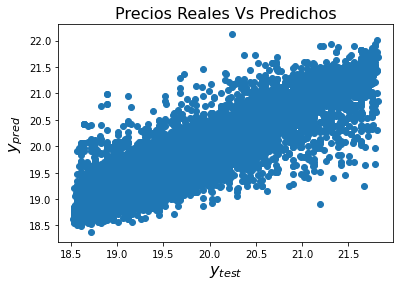

In [ ]:
fig = plt.figure()
plt.scatter(y_test, pred)
plt.xlabel(r'$y_{test}$',fontsize=16)
plt.ylabel(r'$y_{pred}$',fontsize=16)
plt.title(r'Precios Reales Vs Predichos',fontsize=16)
#fig.savefig('temp.png',  dpi=500)

In [ ]:
import plotly.express as px
fig = px.scatter(x=y_test, y=pred)
fig.update_layout(title='Precios Reales Vs Precios Predichos', xaxis_title=  r"$y_{test}$", yaxis_title= dict{r"$y_{pred}$", titlefont=dict(size=30)}, font=dict(size=30))
fig.show()

SyntaxError: ignored